## 线性回归基础

---

线性回归是一种统计方法，用于研究两个或多个变量之间的线性关系。其目的是通过拟合一条直线来预测因变量（目标变量）与自变量（特征变量）之间的关系。线性回归模型可以表示为：

$$ y = wx + b $$

其中：
- $ y $ 是因变量
- $ x $ 是自变量
- $ w $ 是斜率（表示自变量对因变量的影响程度）
- $ b $ 是截距（表示当自变量为零时，因变量的值）

线性回归广泛应用于经济学、金融学、社会科学和自然科学等领域，用于预测和解释变量之间的关系。

### 基础环境配置

In [1]:
import numpy
import matplotlib.pyplot
import pandas

matplotlib.pyplot.style.use("../matplotlib.mplstyle")

### 读取 CSV 数据集

In [2]:
data = pandas.read_csv("./202501061035.csv")

X = (data[["size", "rooms"]]).astype(float).to_numpy()
Y = (data["price"]).astype(float).to_numpy()

X[:, 0] = X[:, 0] / 1000
Y = Y / 1000

### 输出统计坐标系

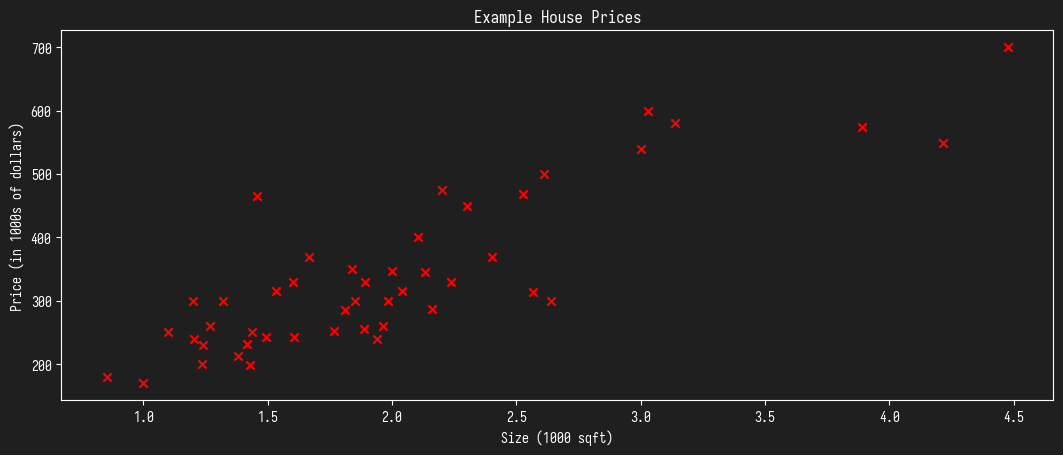

In [3]:
matplotlib.pyplot.scatter(X[:, 0], Y, marker="x", c="r")
matplotlib.pyplot.title("Example House Prices")
matplotlib.pyplot.ylabel("Price (in 1000s of dollars)")
matplotlib.pyplot.xlabel("Size (1000 sqft)")
matplotlib.pyplot.show()

### 一元线性回归相关公式推导

我们首先了解一元线性回归函数：$ f_{w,b}(x^{(i)})=wx^{(i)}+b $，通过变换得到等式：$ g(w)=t(b)=f_{w,b}(x^{(i)})-\hat{y}^{(i)}=wx^{(i)}+b-y^{(i)} $。

利用统计学中的均方误差的公式，带入上方的等式得到：$ MSE(w,b)=\frac{1}{2n}\sum_{i=1}^n(f_{w,b}(x^{(i)})-\hat{y}^{(i)})^2=\frac{1}{2n}\sum_{i=1}^ng(w)^2=\frac{1}{2n}\sum_{i=1}^nt(b)^2 $

对于一元线性回归，均方误差函数即为代价函数，可以计算梯度下降：$ w=w-\alpha\cdot\frac{\partial{MSE(w,b)}}{\partial{w}}, b=b-\alpha\cdot\frac{\partial{MSE(w,b)}}{\partial{b}} $

利用微积分中的偏导数链式规则：$ y=f(g(x))=>\frac{dy}{dx}=\frac{df}{dg}\cdot\frac{dg}{dx} $

进行 $ w $ 的步进计算：$ \frac{\partial{MSE(w,b)}}{\partial{w}}=\frac{\partial{MSE(w,b)}}{\partial{g(w)}}\cdot{\frac{\partial{g(w)}}{\partial{w}}}=(\frac{1}{n}\sum_{i=1}^ng(w))\cdot{(x^{(i)})}=\frac{1}{n}\sum_{i=1}^n(wx^{(i)}+b-\hat{y}^{(i)})\cdot{x^{(i)}} $

进行 $ b $ 的步进计算：$ \frac{\partial{MSE(w,b)}}{\partial{b}}=\frac{\partial{MSE(w,b)}}{\partial{t(b)}}\cdot{\frac{\partial{t(b)}}{\partial{b}}}=(\frac{1}{n}\sum_{i=1}^ng(w))\cdot{(1)}=\frac{1}{n}\sum_{i=1}^n(wx^{(i)}+b-\hat{y}^{(i)}) $

带入梯度下降公式最后得到如下结果：

$$ w=w-\alpha\cdot\frac{\partial{MSE(w,b)}}{\partial{w}}=w-\alpha\cdot\frac{1}{n}\sum_{i=1}^n(wx^{(i)}+b-\hat{y}^{(i)})\cdot{x^{(i)}},b=b-\alpha\cdot\frac{\partial{MSE(w,b)}}{\partial{b}}=b-\alpha\cdot\frac{1}{n}\sum_{i=1}^n(wx^{(i)}+b-\hat{y}^{(i)}) $$

### 程序实现

In [4]:
import math

def compute_mse(X, Y, W, B):
    n = X.shape[0]
    f_wb = W[..., numpy.newaxis] * X + B[..., numpy.newaxis]
    mse = numpy.sum((f_wb - Y) ** 2, axis=-1) / (2 * n)
    return mse

def compute_gradient(X, Y, w, b):
    n = X.shape[0]
    f_wb = w * X + b
    dw = numpy.sum((f_wb - Y) * X) / n
    db = numpy.sum(f_wb - Y) / n
    return dw, db

def compute_gradient_descent(X, Y, alpha, iters):
    tw, tb = 500, 300
    tws, tbs = [], []
    for i in range(iters):
        dw, db = compute_gradient(X, Y, tw, tb)
        tw = tw - alpha * dw
        tb = tb - alpha * db
        if i % math.ceil(iters / 10) == 0:
            tws.append([tw])
            tbs.append([tb])
            print(f"w: {tw: 0.3e}, b:{tb: 0.5e}")
    tws = numpy.array(tws)
    tbs = numpy.array(tbs)
    mse = compute_mse(X, Y, tws, tbs)
    points = numpy.column_stack((tws, tbs, mse))
    return tw, tb, points

fw, fb, points = compute_gradient_descent(X[:, 0], Y, 0.01, 100)

print(f"(w,b) found by gradient descent: ({fw:8.4f},{fb:8.4f})")

w:  4.785e+02, b: 2.90401e+02
w:  3.193e+02, b: 2.19019e+02
w:  2.291e+02, b: 1.78252e+02
w:  1.781e+02, b: 1.54861e+02
w:  1.492e+02, b: 1.41333e+02
w:  1.329e+02, b: 1.33404e+02
w:  1.238e+02, b: 1.28654e+02
w:  1.187e+02, b: 1.25712e+02
w:  1.160e+02, b: 1.23799e+02
w:  1.145e+02, b: 1.22471e+02
(w,b) found by gradient descent: (113.8223,121.5680)


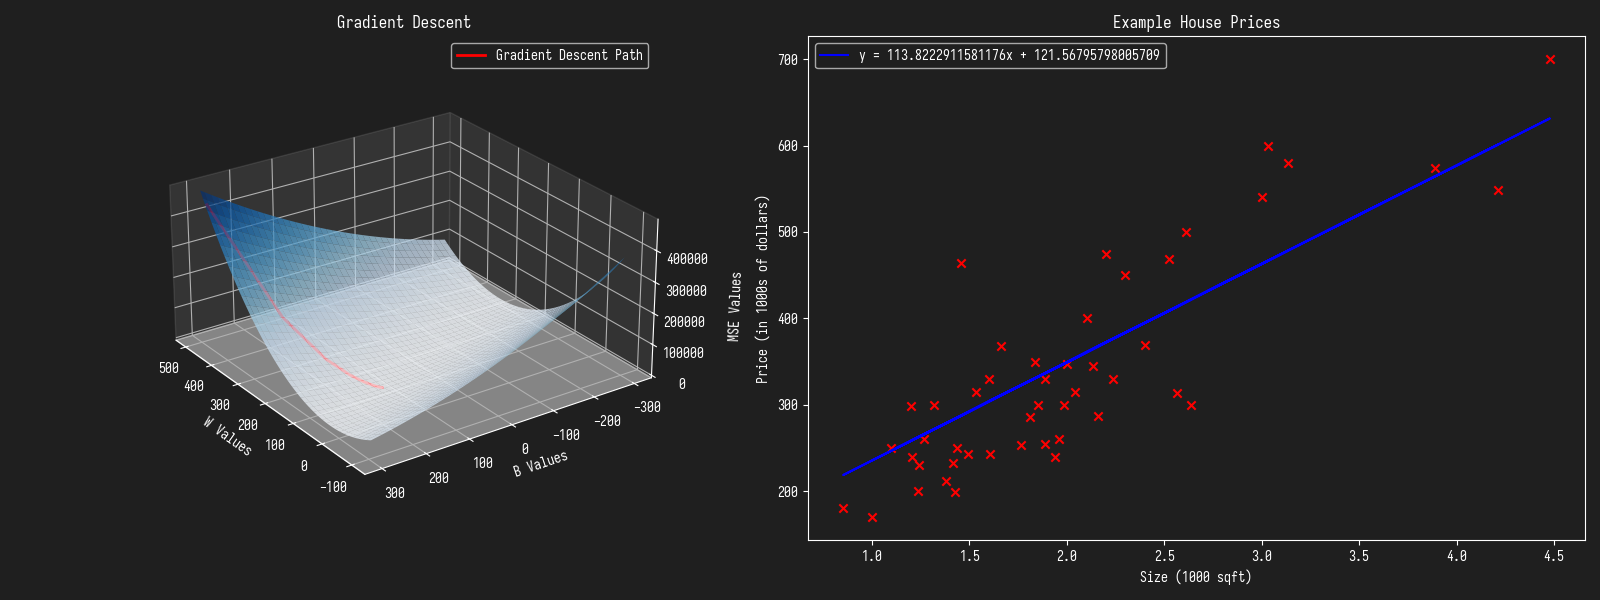

In [5]:
%config InlineBackend.print_figure_kwargs = {"bbox_inches": None}

W = numpy.arange(-100, 500, 5)
B = numpy.arange(-300, 300, 5)
W, B = numpy.meshgrid(W, B)
Z = compute_mse(X[:, 0], Y, W, B)

figure = matplotlib.pyplot.figure(figsize=(16, 6))
axes1 = figure.add_subplot(1, 2, 1, projection="3d")
surface = axes1.plot_surface(W, B, Z, cmap=matplotlib.cm.Blues, alpha=0.75)

axes1.view_init(elev=25, azim=145, roll=0)
axes1.set_title("Gradient Descent")
axes1.set_xlabel("W Values")
axes1.set_ylabel("B Values")
axes1.set_zlabel("MSE Values", labelpad=10)

tws, tbs, mse = points[:, 0], points[:, 1], points[:, 2]
axes1.plot3D(tws, tbs, mse, color="red", linewidth=2, label="Gradient Descent Path")
axes1.legend()
axes1.set_box_aspect([2, 2, 1])

axes2 = figure.add_subplot(1, 2, 2)
axes2.scatter(X[:, 0], Y, marker="x", c="r")
axes2.plot(X[:, 0], fw * X[:, 0] + fb, color="blue", label=f"y = {fw}x + {fb}")
axes2.set_title("Example House Prices")
axes2.legend()
axes2.set_ylabel("Price (in 1000s of dollars)")
axes2.set_xlabel("Size (1000 sqft)")

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

### 多元线性回归

将数据转换为矩阵，矩阵$ X $表示形式如下：

$$
X=\begin{pmatrix}
    x_0^{(0)}&x_1^{(0)}&...&x_{n-1}^{(0)} \\
    x_0^{(1)}&x_1^{(1)}&...&x_{n-1}^{(1)} \\
    ... \\
    x_0^{(m-1)}&x_1^{(m-1)}&...&x_{n-1}^{(m-1)} \\
\end{pmatrix}
$$

设置变量$ W $如下：

$$
W=\begin{pmatrix}
    w_0 \\
    w_1 \\
    ... \\
    w_{n-1}
\end{pmatrix}
$$

### 多元线性回归相关公式

- 多元线性函数：$ f_{W,B}(X^{(i)})=W\cdot{X^{(i)}}+B $
- 均方误差公式：$ MSE(W,B)=\frac{1}{2n}\sum_{i=1}^n(f_{W,B}(X^{(i)}) - \hat{Y}^{(i)})^2 $
- 梯度下降公式：$ W=W-\alpha\cdot\frac{\partial{MSE(W,B)}}{\partial{W}},B=B-\alpha\cdot\frac{\partial{MSE(W,B)}}{\partial{B}} $

In [6]:
import math

def compute_mse(X, Y, w, b):
    n = X.shape[0]
    f_wb = numpy.dot(X, w) + b
    mse = numpy.sum((f_wb - Y) ** 2) / (2 * n)
    return mse

def compute_gradient(X, Y, w, b):
    n = X.shape[0]
    f_wb = numpy.dot(X, w) + b
    dw = numpy.sum(numpy.dot(X.T, (f_wb - Y))) / n
    db = numpy.sum(f_wb - Y) / n
    return dw, db

def compute_gradient_descent(X, Y, alpha, iters):
    tw, tb = numpy.zeros(X.shape[1]), 0
    history = []
    for i in range(iters):
        dw, db = compute_gradient(X, Y, tw, tb)
        tw = tw - alpha * dw
        tb = tb - alpha * db
        if i % math.ceil(iters / 20) == 0:
            mse = compute_mse(X, Y, tw, tb)
            history.append([i, mse])
            print(f"mse:{mse:8.2f}")
    return tw, tb, numpy.array(history)

设置学习率和迭代次数。

In [7]:
LR = 5.0e-5
ITERATIONS = 4000

fw, fb, history = compute_gradient_descent(X, Y, LR, ITERATIONS)

print(f"w: {fw}, b: {fb}")

mse:65408.31
mse:37777.33
mse:22474.53
mse:13999.42
mse: 9305.67
mse: 6706.14
mse: 5266.44
mse: 4469.09
mse: 4027.48
mse: 3782.91
mse: 3647.45
mse: 3572.42
mse: 3530.86
mse: 3507.84
mse: 3495.08
mse: 3488.01
mse: 3484.08
mse: 3481.91
mse: 3480.69
mse: 3480.01
w: [63.69599465 63.69599465], b: 11.30161149538266


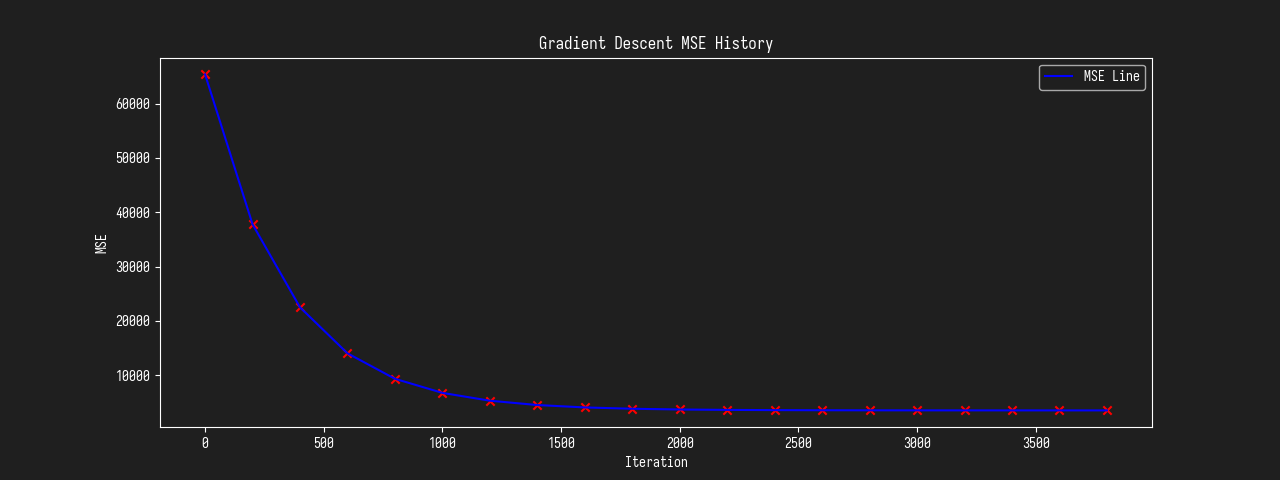

Price for 2.132 sqft and 4 rooms: 401.89k


In [8]:
matplotlib.pyplot.plot(history[:, 0], history[:, 1], linestyle='-', color='b', label='MSE Line')
matplotlib.pyplot.scatter(history[:, 0], history[:, 1], marker="x", c="r")
matplotlib.pyplot.title("Gradient Descent MSE History")
matplotlib.pyplot.legend()
matplotlib.pyplot.ylabel("MSE")
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.show()

sample = [2.132, 4]
price = numpy.dot(sample, fw) + fb
print(f"Price for {sample[0]} sqft and {sample[1]} rooms: {price:.2f}k")